In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
df=pd.read_csv("Concrete_Data_Yeh.csv")
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [88]:
df.shape

(1030, 9)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [90]:
df.isnull().sum()/len(df)*100

cement              0.0
slag                0.0
flyash              0.0
water               0.0
superplasticizer    0.0
coarseaggregate     0.0
fineaggregate       0.0
age                 0.0
csMPa               0.0
dtype: float64

In [91]:
df.skew()

cement              0.509481
slag                0.800717
flyash              0.537354
water               0.074628
superplasticizer    0.907203
coarseaggregate    -0.040220
fineaggregate      -0.253010
age                 3.269177
csMPa               0.416977
dtype: float64

In [75]:
from sklearn.preprocessing import StandardScaler

In [76]:
from sklearn.model_selection import train_test_split

In [120]:
x=df.drop('csMPa',axis=1)
y=df['csMPa']

In [121]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (824, 8)
x_test (206, 8)
y_train (824,)
y_test (206,)


In [122]:
from sklearn.preprocessing import PowerTransformer

In [123]:
Pt = PowerTransformer()
x_train_pt = Pt.fit_transform(x_train)
x_train_pt = pd.DataFrame(x_train_pp, columns= x_train.columns)
y=df['csMPa']

In [124]:
from sklearn.linear_model import LinearRegression

In [125]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)
linreg.score(x_train_pt,y_train)

-14.717840319815007

In [126]:
x_test_pt = Pt.fit_transform(x_test)

In [116]:
linreg.fit(x_test, y_test)
linreg.score(x_test_pt,y_test)

C:\Users\Dell\savitaanaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


-4.871498406390613

In [67]:
print(x_train)
print(x_test)

     cement   slag  flyash  water  superplasticizer  coarseaggregate  \
34    190.0  190.0     0.0  228.0               0.0            932.0   
124   388.6   97.1     0.0  157.9              12.1            852.1   
712   192.0  288.0     0.0  192.0               0.0            929.8   
859   164.0    0.0   200.0  181.0              13.0            849.0   
176   379.5  151.2     0.0  153.9              15.9           1134.3   
..      ...    ...     ...    ...               ...              ...   
40    342.0   38.0     0.0  228.0               0.0            932.0   
490   387.0   20.0    94.0  157.0              11.6            938.0   
256   212.5    0.0   100.4  159.3               8.7           1007.8   
733   349.0    0.0     0.0  192.0               0.0           1056.0   
527   359.0   19.0   141.0  154.0              10.9            942.0   

     fineaggregate  age  
34           670.0  365  
124          925.7   28  
712          716.1    7  
859          846.0   28  
176  

In [110]:
import sweetviz as sv
sweet_report = sv.analyze(df)
sweet_report.show_html('sweet_report.html')

                                             |                                             | [  0%]   00:00 ->…

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Automatically created module for IPython interactive environment


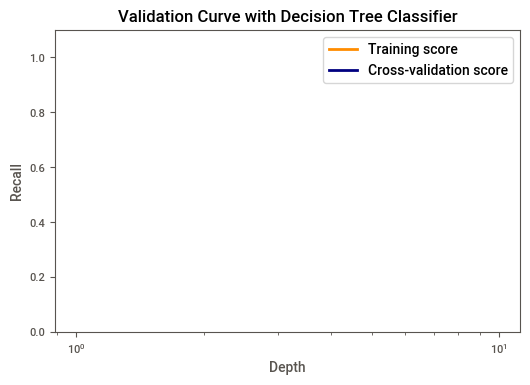

In [111]:
print(__doc__)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import validation_curve
param_range = np.arange(1,50)
train_scores, test_scores = validation_curve(DecisionTreeClassifier(), x_train, y_train, param_name="max_depth",scoring='recall',param_range=param_range,n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Decision Tree Classifier")
plt.xlabel("Depth")
plt.ylabel("Recall")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()